### Import Libraries

In [146]:
## main Libraries
import numpy as np
import pandas as pd

## Datetime , i will need it in feature engineering step
from datetime import date

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import datetime

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## CLustering
from sklearn.cluster import KMeans ##, AgglomerativeClustering
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
## Set the figure and axes face color
sns.set(rc={"axes.facecolor": "#FFE4D9", "figure.facecolor": "#FFE4D9"})
## custom palette
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_palette)
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### Load Data

In [147]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [148]:
df.head(30)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
10  1994        1983  Graduation        Married      NaN        1         0   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   
16  9736        1980  Graduation        Married  41850.0        1         1   
17  4939        1946  Graduation       Together  37760.0        0         0   
18  6565        1949      Master        Married  76995.0        0         1   
19  2278        1985    2n Cycle         Single  33812.0        1         0   
20  9360        1982  Graduation        Married  37040.0        0         0   
21  5376        1979  Graduation        Married   2447.0        1         0   
22  1993        1949         PhD        Married  58607.0        0         1   
23  4047        1954         PhD        Married  65324.0        0         1   
24  1409        1951  Graduation       Together  40689.0        0         1   
25  7892        1969  Graduation         Single  18589.0        0         0   
26  2404        1976  Graduation        Married  53359.0        1         1   
27  5255        1986  Graduation         Single      NaN        1         0   
28  9422        1989  Graduation        Married  38360.0        1         0   
29  1966        1965         PhD        Married  84618.0        0         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   04-09-2012       58       635         88              546   
1   08-03-2014       38        11          1                6   
2   21-08-2013       26       426         49              127   
3   10-02-2014       26        11          4               20   
4   19-01-2014       94       173         43              118   
5   09-09-2013       16       520         42               98   
6   13-11-2012       34       235         65              164   
7   08-05-2013       32        76         10               56   
8   06-06-2013       19        14          0               24   
9   13-03-2014       68        28          0                6   
10  15-11-2013       11         5          5                6   
11  13-11-2012       59         6         16               11   
12  15-11-2013       82       194         61              480   
13  15-11-2013       53       233          2               53   
14  10-10-2012       38         3         14               17   
15  24-11-2012       23      1006         22              115   
16  24-12-2012       51        53          5               19   
17  31-08-2012       20        84          5               38   
18  28-03-2013       91      1012         80              498   
19  03-11-2012       86         4         17               19   
20  08-08-2012       41        86          2               73   
21  06-01-2013       42         1          1             1725   
22  23-12-2012       63       867          0               86

In [149]:
df.shape

(2240, 29)

### Statistical information about the data

In [150]:
df.describe(include="number").T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

#### `Note :`
    - Income : mean almost equal 52247 and min value equal 1730 and max value equal 666666
               The outliers here may be due to the difference in education level of each customer
    - Year_Birth : mean almost equal 1969 and min equal 1893 and max equal 1996 
    - age : mean equal 54 
    - Kidhome : min equal 0 (They have no children) and max equal 2
    - Teenhome : min equal 0 (They don't have teens) and max equal 2 
    - Customers spend more on meat products
    - Customers spend least on fruits products

In [151]:
df.describe(include="O").T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864
Dt_Customer     2240    663  31-08-2012    12

#### `Note :`
    - Education Feature : mode is Graduation and has 5 unique values
    - Marital_Status Feature : mode is Married and has 8 unique values

-------------

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#B3E5B2;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'></span> Data Preprocessing
</div>

## Data Cleaning

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b>Dt_Customer Column Data type is Object, I will Convert it to Datetime Datatype.</div>

In [153]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")
## 'coerce' invalid parsing will be set as NaT.

In [154]:
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


### Null Values

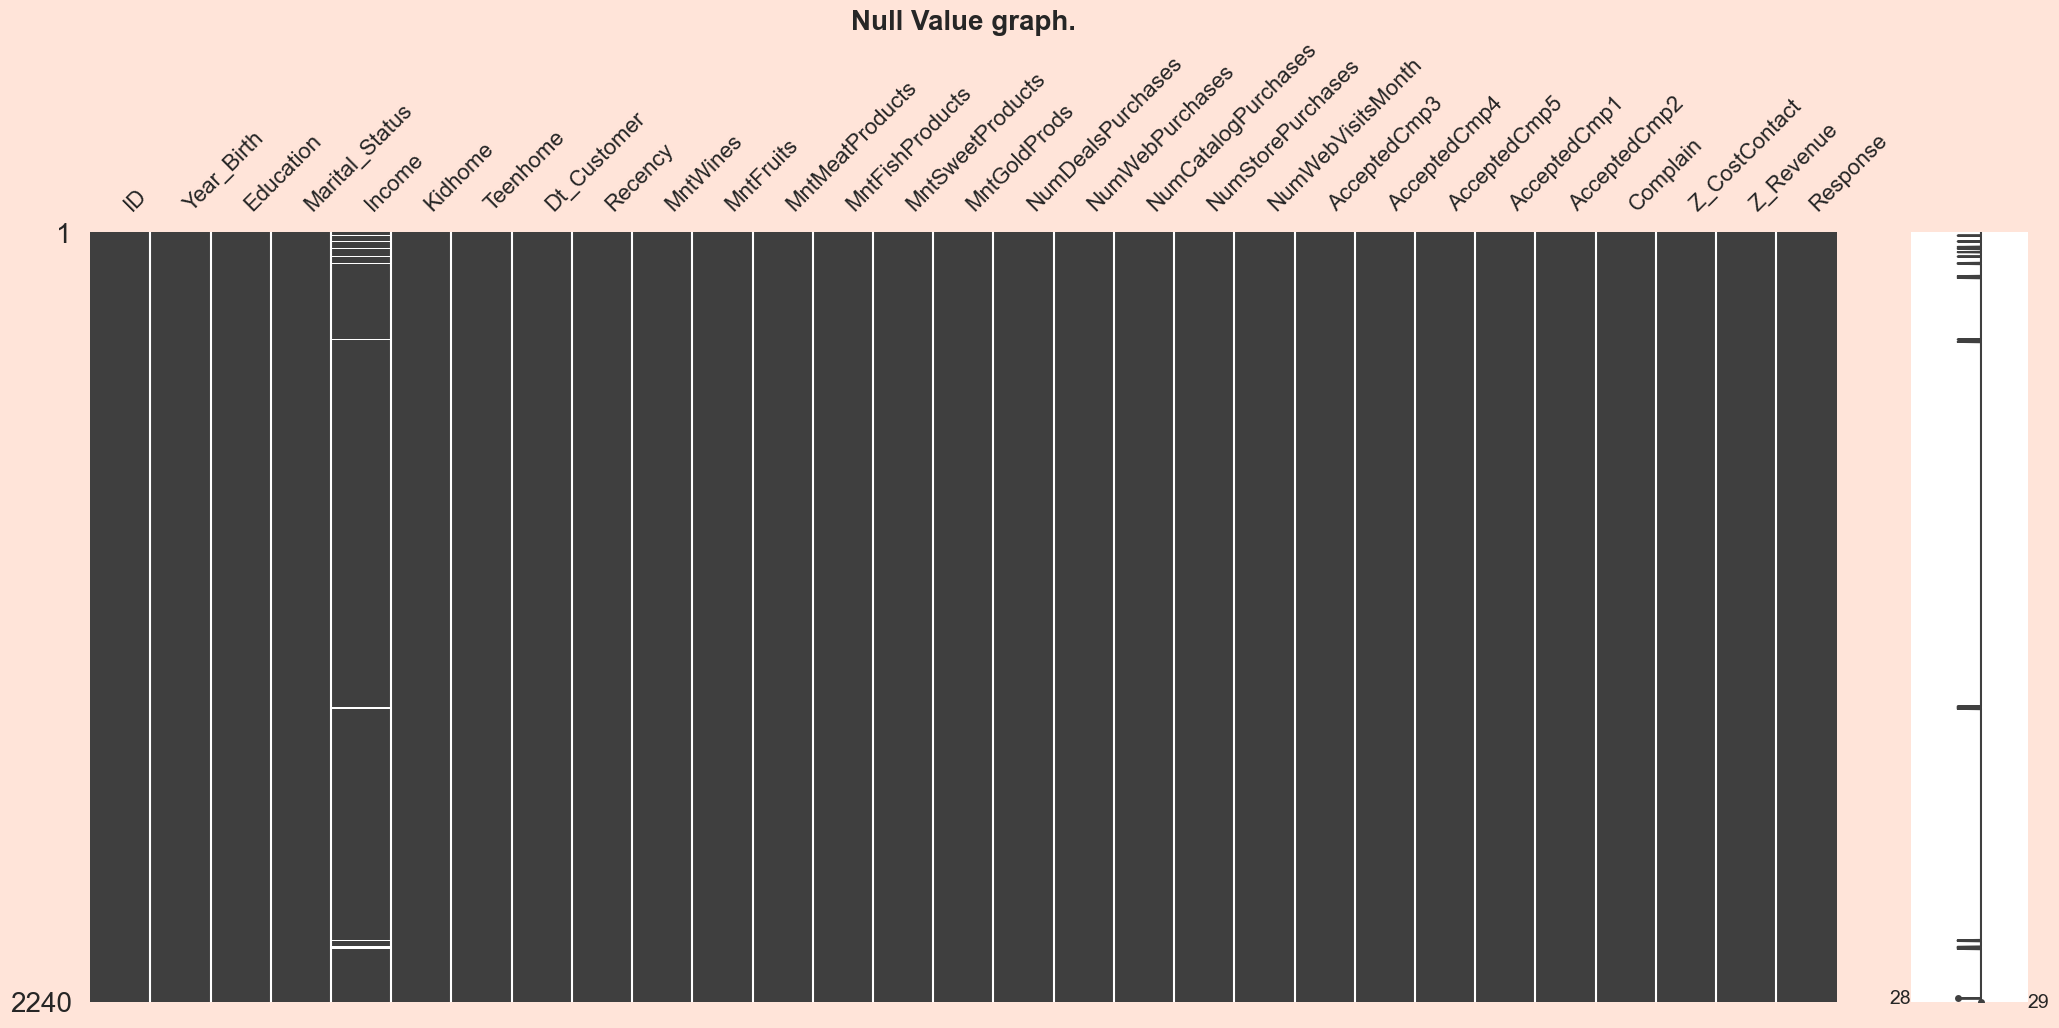

In [155]:
msno.matrix(df) 
plt.title("Null Value graph.", fontsize=20, weight="bold")
plt.show()

In [156]:
(df.isna().sum() / df.shape[0]) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [157]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

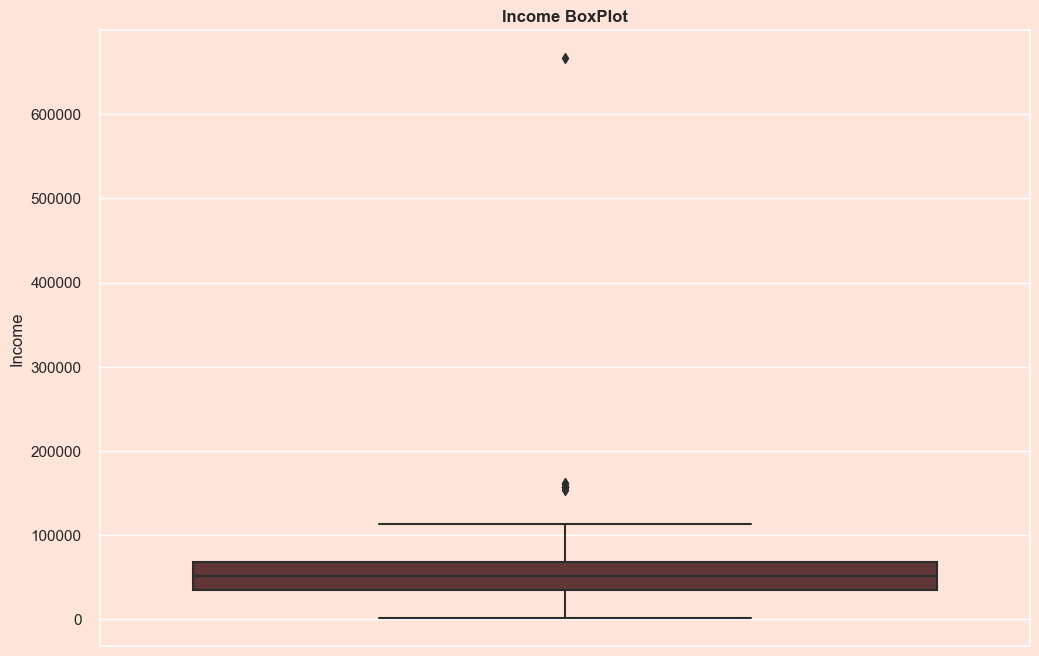

In [158]:
sns.boxplot(y="Income", data=df)
plt.title("Income BoxPlot", weight="bold")
plt.show()

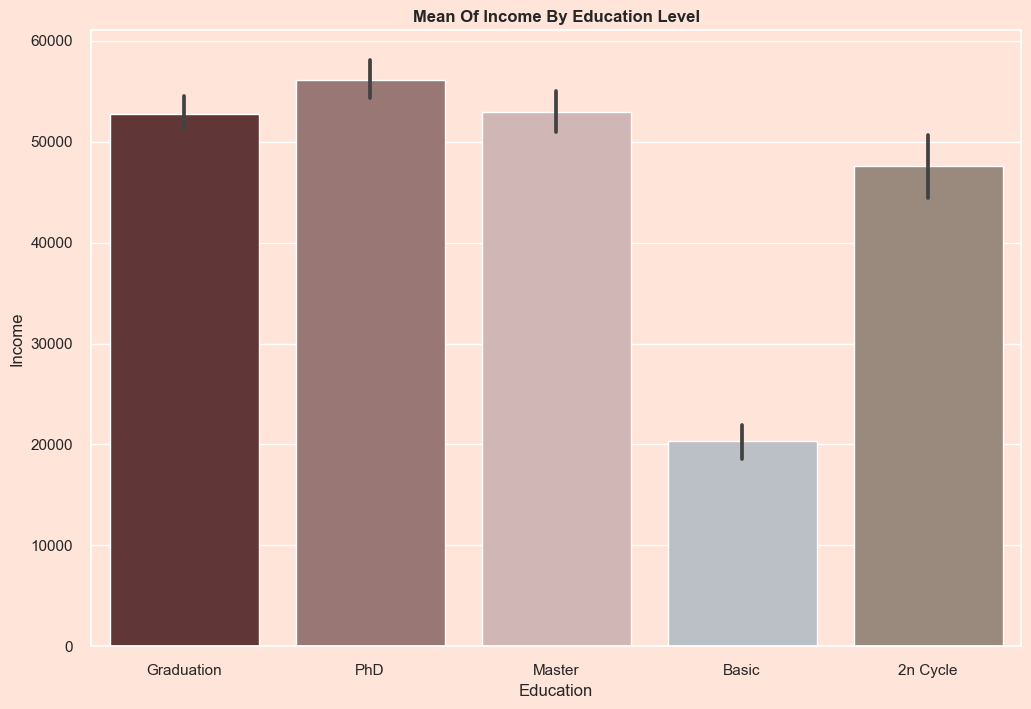

In [159]:
sns.barplot(x="Education", y="Income", data=df)
plt.title("mean of Income by Education level".title() , weight="bold")
plt.show()

### Imputing by Sub-Group

In [160]:
income_imputer = df.groupby("Education")["Income"].median().to_dict()
income_imputer

{'2n Cycle': 46805.0,
 'Basic': 20744.0,
 'Graduation': 52028.5,
 'Master': 50943.0,
 'PhD': 55212.0}

In [161]:
df["Income"] = df["Income"].fillna(df["Income"].map(income_imputer))

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> i filled Missing Values in Income Column with median by Education Level as Sub-Group. i did it because there is outliers and Income varies depending on the level of education.</div>

### Duplicated

In [162]:
df.duplicated().sum()

0

## <b>2.2 <span style='color:#682F2F'>Feature Engineering (Extraction) and Data Preparation</span></b>

In [163]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1786  2870        1973  Graduation        Married  49094.0        0         1   
1962  6355        1978  Graduation        Married  44359.0        1         1   
984   5718        1950  Graduation        Married  80763.0        0         0   
1553  7321        1962  Graduation       Together  76081.0        0         0   
427   8746        1989  Graduation        Married  75433.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1786  2012-09-21        6       376          0               38   
1962  2014-06-17       19        20          0               14   
984   2013-08-15       17       674        168              108   
1553  2014-05-23       85       292         30              415   
427   2014-04-05       28       800          0              297   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1786               11                 8            69                  5   
1962                7                 3             1                  3   
984               192                42           231                  1   
1553               63                33           200                  1   
427                 0                34            57                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1786                6                    3                  6   
1962                2                    0                  4   
984                 5                   11                  6   
1553                4                    5                  4   
427                 2                    5                 10   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1786                  6             0             0             0   
1962                  3             0             0             0   
984                   3             0             0             1   
1553                  2             0             0             0   
427                   6             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
1786             0             0         0              3         11         0  
1962             0             0         0              3         11         0  
984              1             0         0              3         11         1  
1553             1             0         0              3         11         0  
427              1             0         0              3         11         0

In [164]:
data = df.copy()

In [165]:
## age feature creation
data['Age'] = 2023 - data['Year_Birth']

In [166]:
## Spending feature creation
data['spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] \
                        + data['MntSweetProducts'] + data['MntGoldProds']

In [167]:
## Seniority feature creation
last_date = date(2023,9, 10)

def seniority(x):
    return last_date - x

data['Seniority'] = pd.to_numeric(data['Dt_Customer'].dt.date.apply(seniority).dt.days, downcast='integer')/365

In [168]:
## rename some cols
data=data.rename(columns={'NumWebPurchases': 'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [169]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [170]:
## Matrial Status, i will  convert to 2 unique values .. 
## Alone ==> Divorced, Single, Absurd, Widow , YOLO.
## In couple ==> Married, Together.
data["Marital_Status"] = data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [171]:
data["Marital_Status"].nunique()

2

In [172]:
print(f"Education column number of unique value : {data['Education'].nunique()}")
print(f"Education column unique value : {data['Education'].unique()}")

Education column number of unique value : 5
Education column unique value : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [173]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [174]:
## Education column , i will  convert to 2 unique values .. 
## ungrad. ==> Basic, 2n Cycle .
## postgrad. ==> Graduation, Master, PhD.
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [175]:
print(f"after update , Education column number of unique value : {data['Education'].nunique()}")
print(f"after update , Education column unique value : {data['Education'].unique()}")

after update , Education column number of unique value : 2
after update , Education column unique value : ['Postgraduate' 'Undergraduate']


In [176]:
print(f"num of unique value in kidhome : {data['Kidhome'].nunique()}")
print(f"num of unique value in Teenhome : {data['Teenhome'].nunique()}")

num of unique value in kidhome : 3
num of unique value in Teenhome : 3


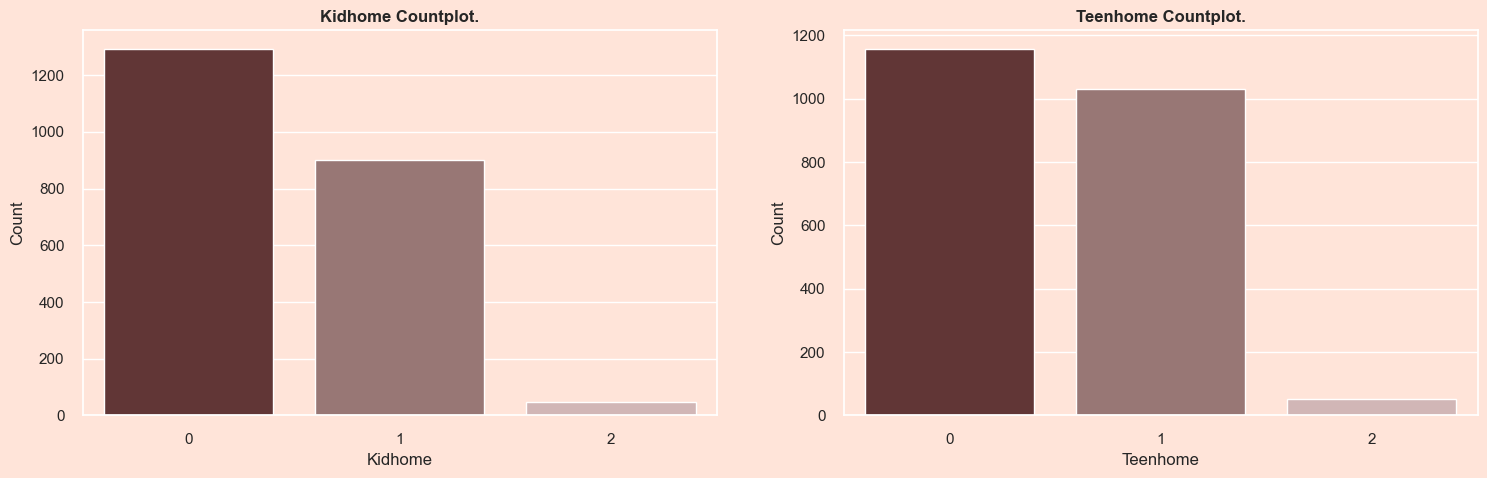

In [177]:
used_cols = ["Kidhome", "Teenhome"]

fig, ax = plt.subplots(1, 2, figsize = (18,5))

for i in range(2):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i])
    ax[i].set_title(f"{used_cols[i]} Countplot.", weight="bold")
    ax[i].set_ylabel("Count")

plt.show()

In [178]:
## Children feature creation
data['Children'] = data['Kidhome'] + data['Teenhome']

In [179]:
def has_chid_or_no(x):
    if x > 0:
        return "Has child"
    else :
        return "no child"
    
data['Has_child'] = data["Children"].apply(has_chid_or_no)

In [180]:
data['Has_child'].value_counts()

Has_child
Has child    1602
no child      638
Name: count, dtype: int64

In [181]:
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [182]:
data['Children'].value_counts()

Children
1 child       1128
No child       638
2 children     421
3 children      53
Name: count, dtype: int64

In [183]:
## rename some cols
data = data.rename(columns={'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals'})


In [184]:
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sample(5)
## Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
597              0             0             0             0             0   
162              0             0             0             0             0   
1566             0             0             0             1             0   
1584             0             0             0             0             0   
87               1             0             0             1             0   

      Response  
597          0  
162          0  
1566         0  
1584         1  
87           1

In [185]:
## Campaigns_Accepted feature creation
data['Campaigns_Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [186]:
data['Campaigns_Accepted'].value_counts().to_frame()

count
Campaigns_Accepted       
0                    1777
1                     325
2                      83
3                      44
4                      11

In [187]:
## drop some features
drop_list =['ID', 'Year_Birth' ,'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact','Z_Revenue']
data.drop(drop_list, inplace=True, axis=1)
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_Accepted'],
      dtype='object')

In [188]:
## rename columns 
data.columns = data.columns.str.capitalize()

---------------

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#B3E5B2;
            overflow:hidden;
            font-weight:700"> <span style='color:#B3E5B2'></span> Data Analysis
</div>

## Univariate Analysis
###### - explores each variable in a data set, separately.

In [189]:
data.sample(3)

Education Marital_status   Income Dt_customer  Recency  Wines  \
33    Postgraduate          Alone  46610.0  2012-10-29        8     96   
1188  Postgraduate      In couple  31497.0  2012-12-06       22    108   
437   Postgraduate          Alone  51529.0  2013-09-07       14    400   

      Fruits  Meat  Fish  Sweets  Gold  Deals  Web  Catalog  Store  \
33        12    96    33      22    43      6    4        1      6   
1188       1    28    13       1     4      2    3        1      4   
437        4    35     6       0    22      2    9        1      5   

      Numwebvisitsmonth  Complain  Response  Age  Spending  Seniority  \
33                    6         0         1   71       302  10.871233   
1188                  8         0         0   61       155  10.767123   
437                   8         0         0   74       467  10.013699   

        Children  Has_child  Campaigns_accepted  
33    2 children  Has child                   0  
1188     1 child  Has child                   0  
437      1 child  Has child                   0

###### 'Age Column'

In [190]:
np.floor(data["Age"].describe()).to_frame()

Age
count  2240.0
mean     54.0
std      11.0
min      27.0
25%      46.0
50%      53.0
75%      64.0
max     130.0

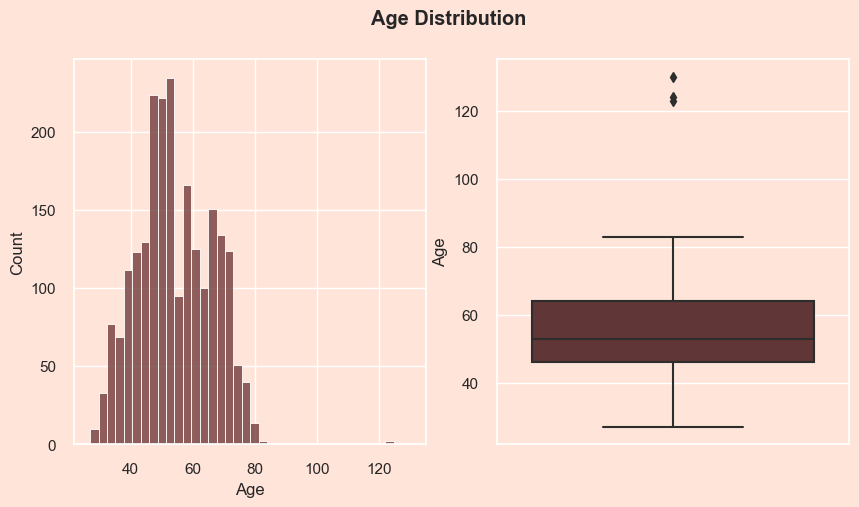

In [191]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

In [192]:
## replace outliers with mean value
age_mean = data['Age'].mean()
data.loc[data['Age'] > 83,'Age'] = age_mean

In [193]:
np.floor(data["Age"].describe()).to_frame()

Age
count  2240.0
mean     54.0
std      11.0
min      27.0
25%      46.0
50%      53.0
75%      64.0
max      83.0

In [194]:
fig = px.histogram(data["Age"], marginal="box", title="<b>Age Distribution After Handling Outliers",
                   color_discrete_map={"Age":"darkred"})
fig.show()

print(f"Skewness of Age Distribution is {data['Age'].skew()}")

Skewness of Age Distribution is 0.09329573397028006


###### `The ages of customers range from 11 to 83, and the average age is equal to 54`

###### 'Income Column'
- Customer's yearly household income

In [195]:
data['Income'].describe().to_frame()

Income
count    2216.000000
mean    52247.251354
std     25173.076661
min      1730.000000
25%     35303.000000
50%     51381.500000
75%     68522.000000
max    666666.000000

The average income is 52247.25 and the min income value is 1730

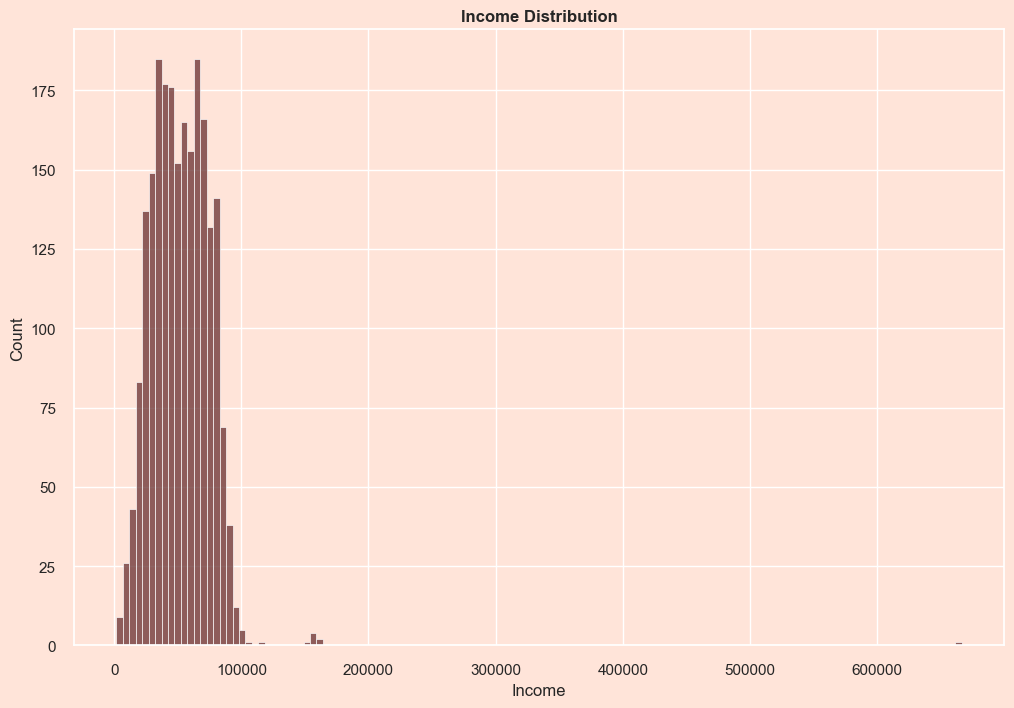

In [196]:
sns.histplot(data=data, x="Income")
plt.title("Income Distribution", weight="bold")
plt.show()

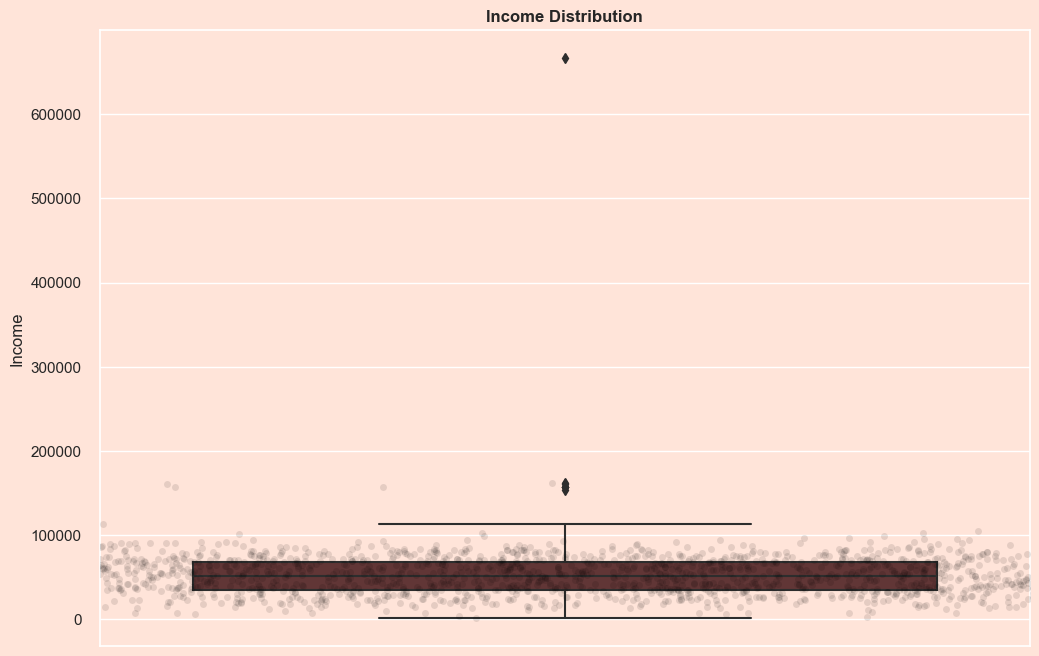

In [197]:
sns.boxplot(data=data, y="Income")
sns.stripplot(data=data, y="Income", jitter=0.8, alpha=0.1, color='black')
plt.title("Income Distribution", weight="bold")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b>NOTE : </b>Income column have outliers, let's handle it.</div>

In [198]:
## drop outliers
data = data.loc[(data["Income"] <= 200000)]
## reset index after drop outliers
data.reset_index(drop=True, inplace=True)
print(f'Shape After Drop Outliers : {data.shape}')
print(f'Statistics Info. about Income : \n{data["Income"].describe()}')

Shape After Drop Outliers : (2215, 24)
Statistics Info. about Income : 
count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64


In [199]:
fig = px.histogram(data["Income"], marginal="box", title="<b>Income Distribution After Handling Outliers",
                  color_discrete_map={"Income":"darkred"})
fig.show()

print(f"Skewness of Income Distribution is {data['Income'].skew()}")

Skewness of Income Distribution is 0.34734967591402816


##### 'Seniority Column'
- The customer has been dealing with the company for how many years

In [200]:
data['Seniority'].describe()

count    2215.000000
mean       10.173983
std         0.554736
min         9.205479
25%         9.698630
50%        10.178082
75%        10.654795
max        11.120548
Name: Seniority, dtype: float64

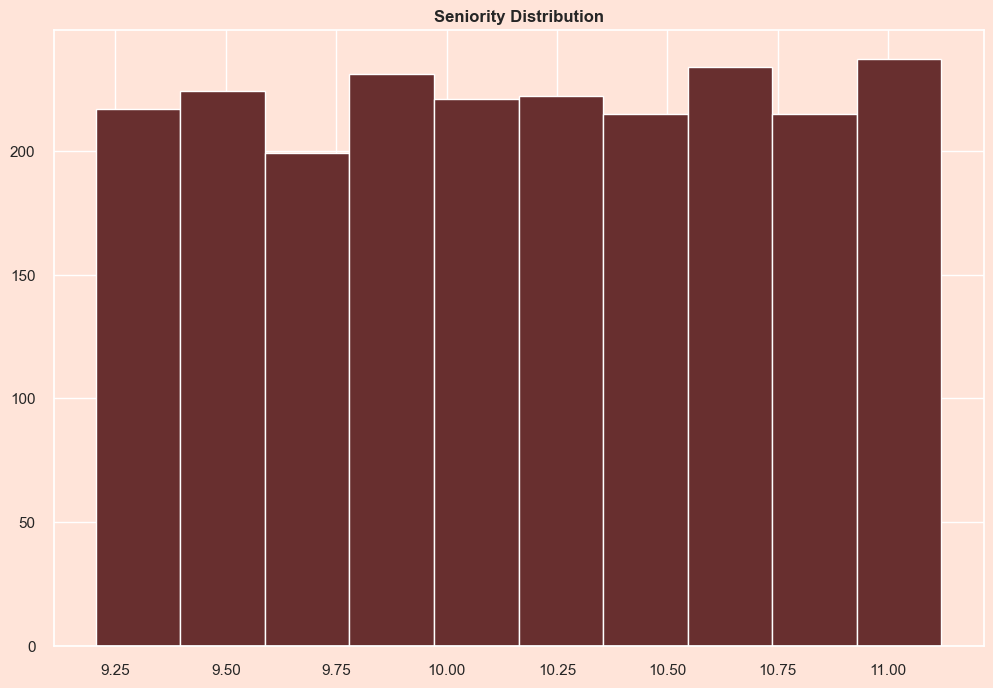

In [201]:
plt.hist(x=data["Seniority"])
plt.title("Seniority Distribution", weight="bold")
plt.show()

### 'Products'
- ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
- Amount spent in last 2 years

In [202]:
products = data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
products.describe()

Wines       Fruits         Meat         Fish       Sweets  \
count  2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean    305.225282    26.361625   167.063205    37.651016    27.040632   
std     337.345380    39.802036   224.311559    54.760822    41.077594   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000     2.000000    16.000000     3.000000     1.000000   
50%     175.000000     8.000000    68.000000    12.000000     8.000000   
75%     505.000000    33.000000   232.500000    50.000000    33.000000   
max    1493.000000   199.000000  1725.000000   259.000000   262.000000   

              Gold  
count  2215.000000  
mean     43.979684  
std      51.822660  
min       0.000000  
25%       9.000000  
50%      25.000000  
75%      56.000000  
max     321.000000


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> - Right Skewed (Positive) in ALL PRODUCTS: The mean is greater than the median</div>

In [203]:
data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

Wines     676074
Fruits     58391
Meat      370045
Fish       83397
Sweets     59895
Gold       97415
dtype: int64

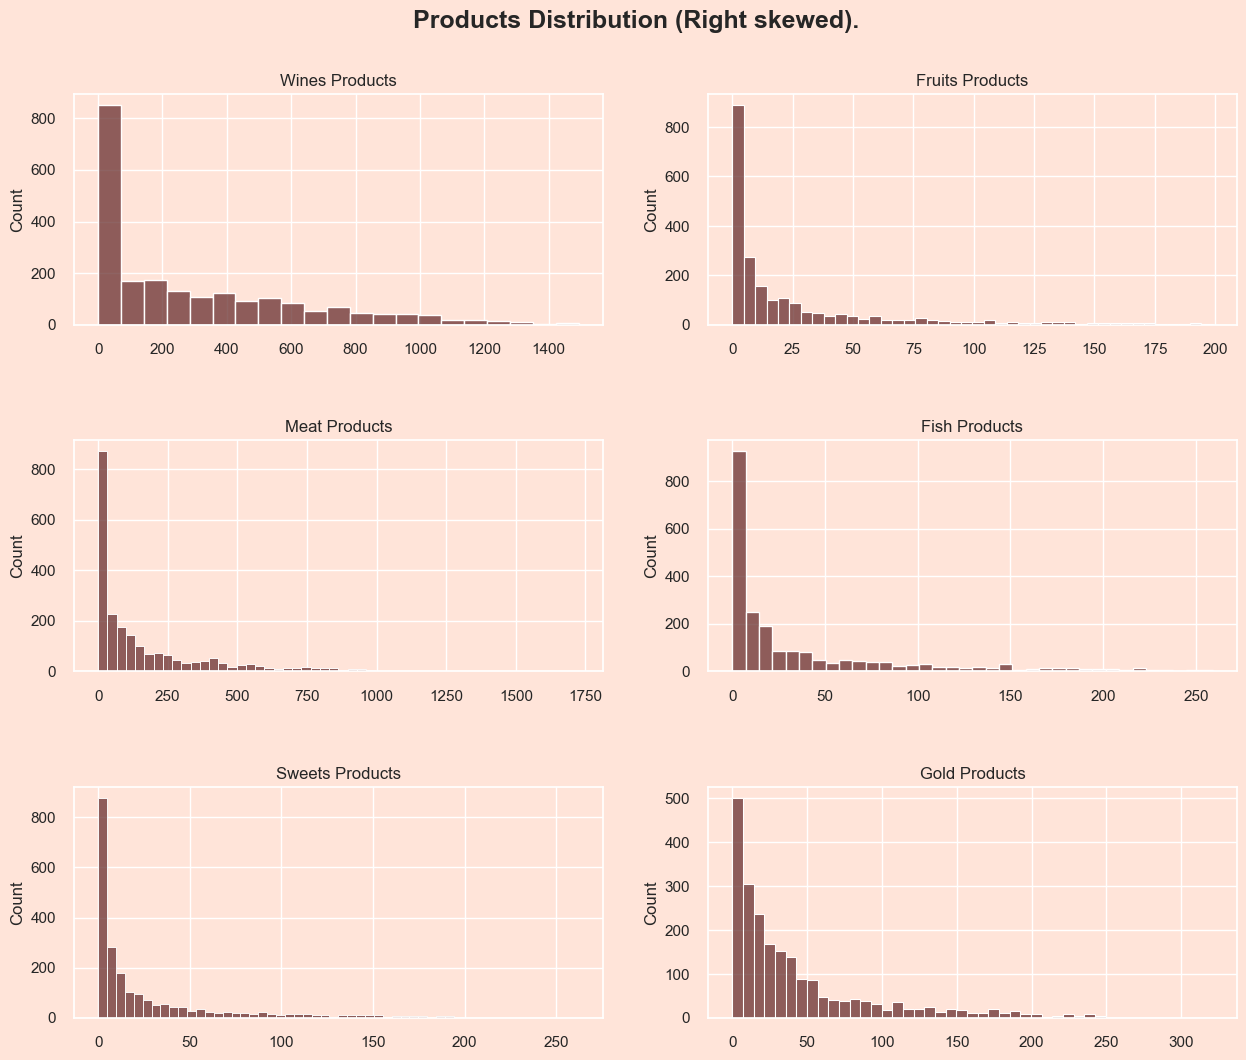

In [204]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution (Right skewed).", fontsize=18, y=0.95, weight="bold")



for i, product in enumerate(products.columns.tolist()):
    
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])
    
    # chart formatting
    ax.set_title(f"{product} Products")
    ax.set_xlabel("")

plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Note : </b> Distribution plots indicate skewed to the right distributions of features. Thus, it is crucial to avoid assuming that a product (e.g., Wines, meats) is the top-selling. </div>

###### Spending Columns

In [205]:
data["Spending"].describe().to_frame()

Spending
count  2215.000000
mean    607.321445
std     602.925291
min       5.000000
25%      69.000000
50%     397.000000
75%    1048.000000
max    2525.000000


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> - Right Skewed (Positive) in ALL PRODUCTS: The mean is greater than the median</div>

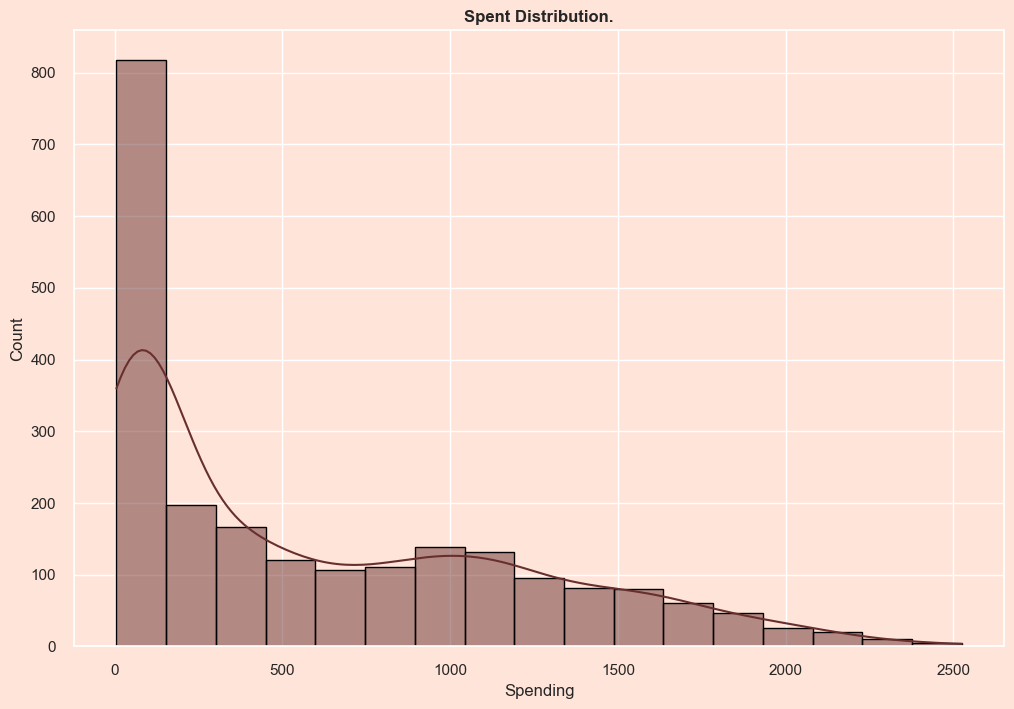

In [206]:
sns.histplot(data=data, x="Spending", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> More than 50% of customers spend less than 10000$ </div>

##### Education Column

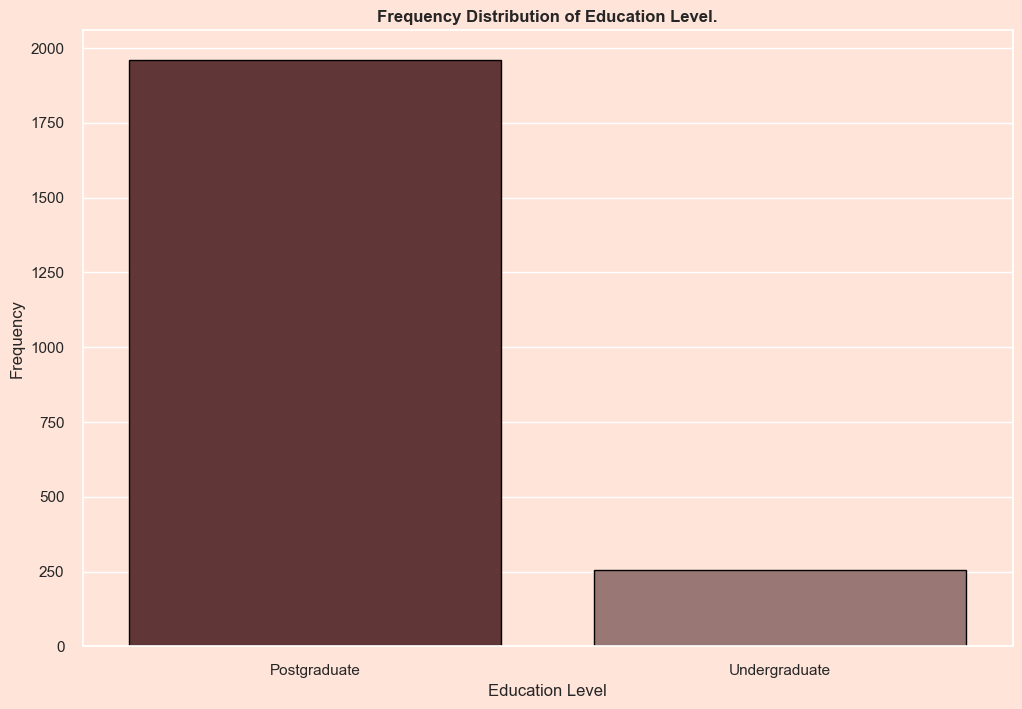

In [207]:
sns.countplot(data=data, x="Education",edgecolor="black")
plt.title("Frequency Distribution of Education Level.", weight="bold")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

In [208]:
pd.DataFrame({"Count" : data["Education"].value_counts(),
              "Ratio" : round(data["Education"].value_counts(normalize=True),2)*100})

Count  Ratio
Education                  
Postgraduate    1961   89.0
Undergraduate    254   11.0


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:30%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority is Postgraduate, 89%. </div>

##### Marital_status Column

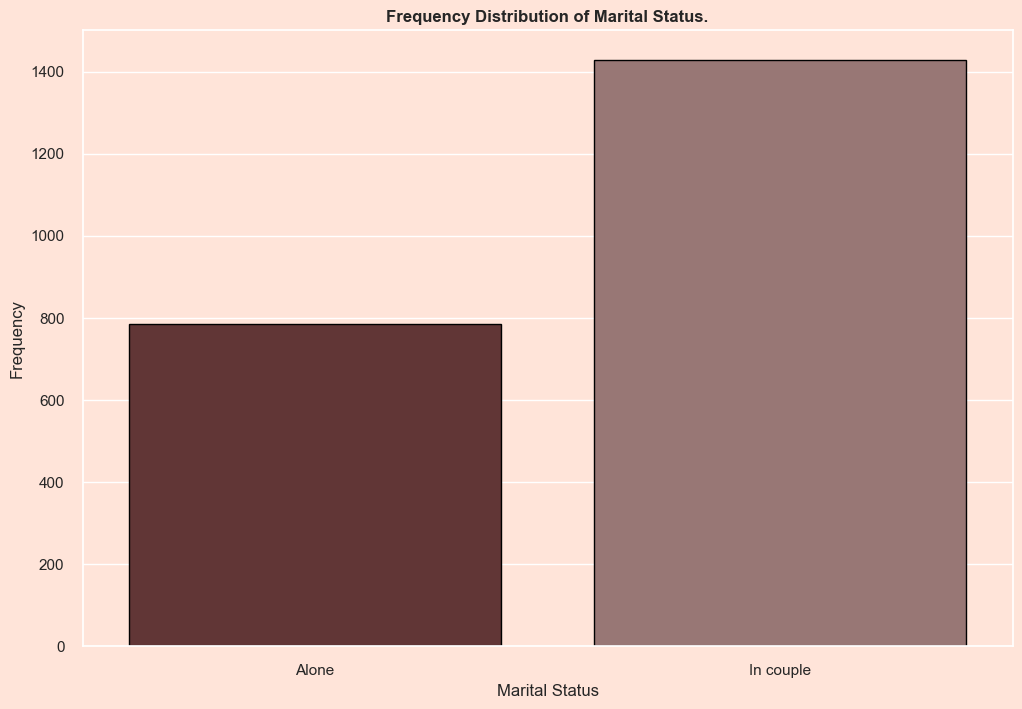

In [209]:
sns.countplot(data=data, x="Marital_status", edgecolor="black")
plt.title("Frequency Distribution of Marital Status.", weight="bold")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

In [210]:
pd.DataFrame({"Count" : data["Marital_status"].value_counts(),
              "Ratio" : round(data["Marital_status"].value_counts(normalize=True),2)*100})

Count  Ratio
Marital_status              
In couple        1429   65.0
Alone             786   35.0


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority is In couple, 65%. </div>

##### 'Children Column'
- sum of kidhome and teenhome columns

In [211]:
pd.DataFrame({"Count" : data["Children"].value_counts(),
              "Ratio" : round(data["Children"].value_counts(normalize=True),2)*100})

Count  Ratio
Children                
1 child      1116   50.0
No child      633   29.0
2 children    416   19.0
3 children     50    2.0

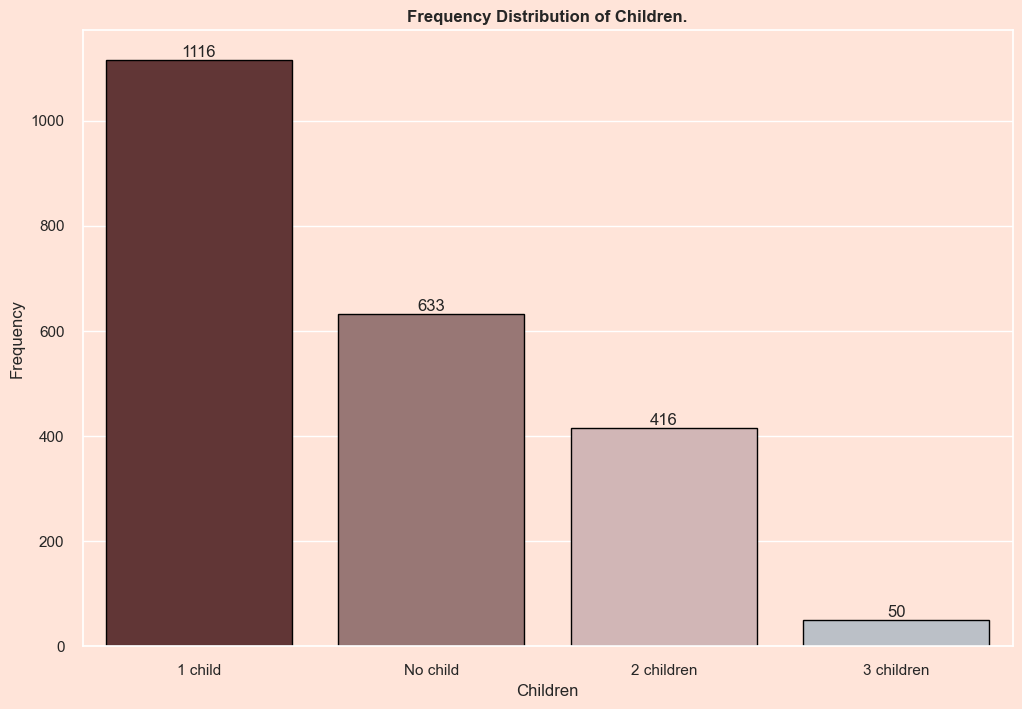

In [212]:
ax = sns.countplot(data=data, x="Children", edgecolor="black",
                   order = data['Children'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Children.", weight="bold")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 50% of clients have one child. </div>

In [213]:
pd.DataFrame({"Count" : data["Has_child"].value_counts(),
              "Ratio" : round(data["Has_child"].value_counts(normalize=True),2)*100})

Count  Ratio
Has_child              
Has child   1582   71.0
no child     633   29.0

In [214]:
px.histogram(data,
             x="Has_child",
             color_discrete_sequence=px.colors.qualitative.Antique,
             title= "<b>Visualizing Has Child Feature Frequencies")


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:25%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 71% of customers have children. </div>

###### 'Campaigns_accepted Column'
- sum of AcceptedCmp

In [215]:
## check data type
data["Campaigns_accepted"].dtype

dtype('int64')

In [216]:
data["Campaigns_accepted"].unique()

array([0, 1, 2, 3, 4])

In [217]:
pd.DataFrame({"Count" : data["Campaigns_accepted"].value_counts(),
              "Ratio" : round(data["Campaigns_accepted"].value_counts(normalize=True),3)*100})

Count  Ratio
Campaigns_accepted              
0                    1756   79.3
1                     323   14.6
2                      81    3.7
3                      44    2.0
4                      11    0.5

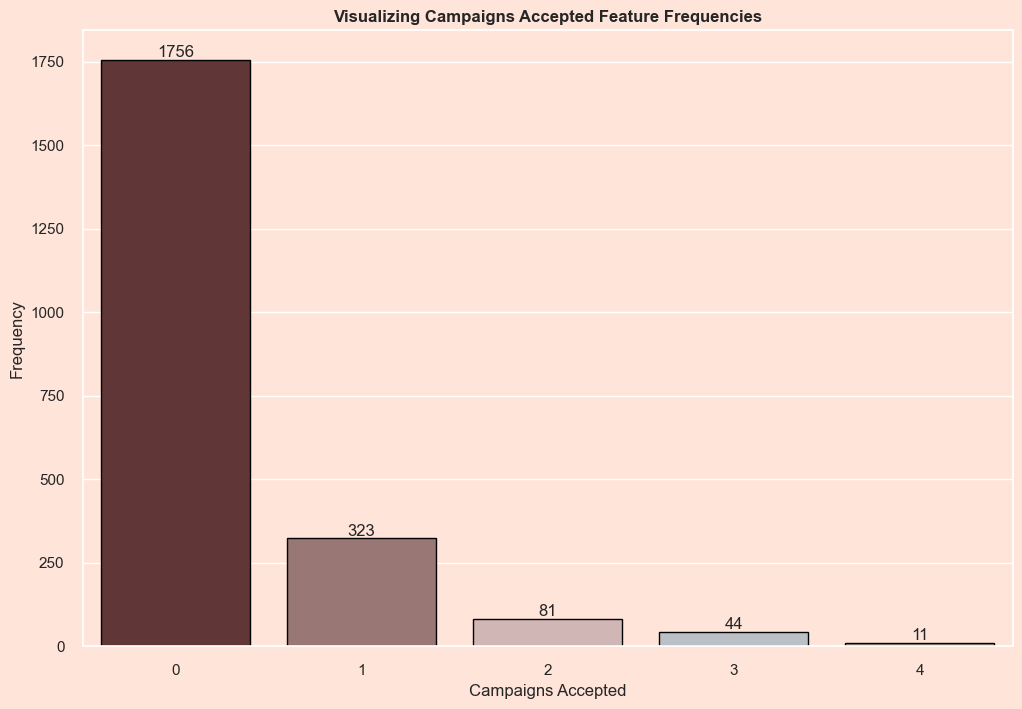

In [218]:
ax = sns.countplot(data=data, x="Campaigns_accepted", edgecolor="black")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Visualizing Campaigns Accepted Feature Frequencies", weight="bold")
plt.xlabel("Campaigns Accepted")
plt.ylabel("Frequency")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The majority of campaigns are unacceptable, at a rate of 79% . </div>

##### 'Response Column'
-  1 if customer accepted the offer in the last campaign, 0 otherwise

In [219]:
## et's see the unique value
df["Response"].unique() 

array([1, 0])

In [220]:
pd.DataFrame({"Count" : data["Response"].value_counts(),
              "Ratio" : round(data["Response"].value_counts(normalize=True),3)*100})

Count  Ratio
Response              
0          1882   85.0
1           333   15.0

##### 'Recency Column'
-  Number of days since customer's last purchase

In [221]:
data["Recency"].dtype

dtype('int64')

In [222]:
data["Recency"].describe()

count    2215.000000
mean       49.024379
std        28.949608
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

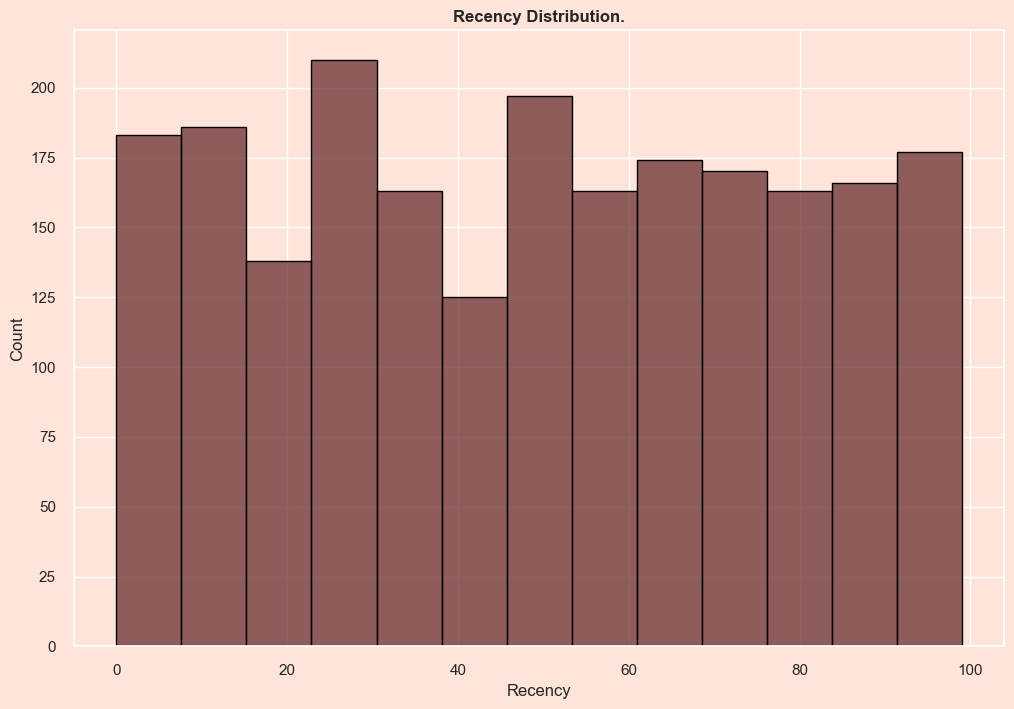

In [223]:
sns.histplot(data=data,
            x="Recency",
            edgecolor='black')
plt.title("Recency Distribution.", weight="bold")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:29%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Last Purchase in Range 1,89 Days. </div>

--------------

##### 'Place'
- ['Web', 'Catalog', 'Store'] 
- Web: Number of purchases made through the company’s website
- Catalog: Number of purchases made using a catalogue
- Store: Number of purchases made directly in stores

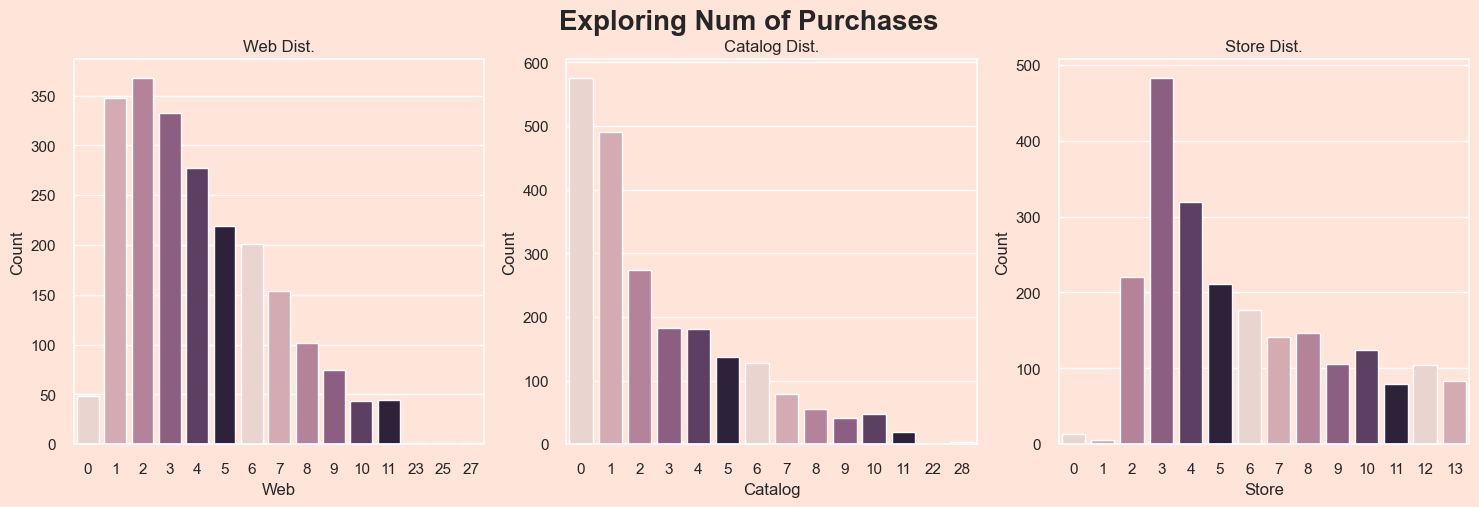

In [224]:
used_cols = ['Web', 'Catalog', 'Store']

fig, ax = plt.subplots(1, 3, figsize = (18,5)) 
plt.suptitle("Exploring Num of Purchases", fontsize=20, weight="bold") 

for i in range(3):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i], palette=sns.cubehelix_palette())
    ax[i].set_title(f"{used_cols[i]} Dist.")
    ax[i].set_ylabel("Count")

plt.show()

---------------

In [225]:
data[['Web', 'Catalog', 'Store']].describe()

Web      Catalog        Store
count  2215.000000  2215.000000  2215.000000
mean      4.085779     2.671783     5.802257
std       2.741473     2.927179     3.250974
min       0.000000     0.000000     0.000000
25%       2.000000     0.000000     3.000000
50%       4.000000     2.000000     5.000000
75%       6.000000     4.000000     8.000000
max      27.000000    28.000000    13.000000

In [226]:
Purchases = pd.DataFrame(data[['Web', 'Catalog', 'Store']].sum()).rename(columns={0:"Count"})
Purchases

Count
Web       9050
Catalog   5918
Store    12852

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Most purchases are made through the store and web.</div>


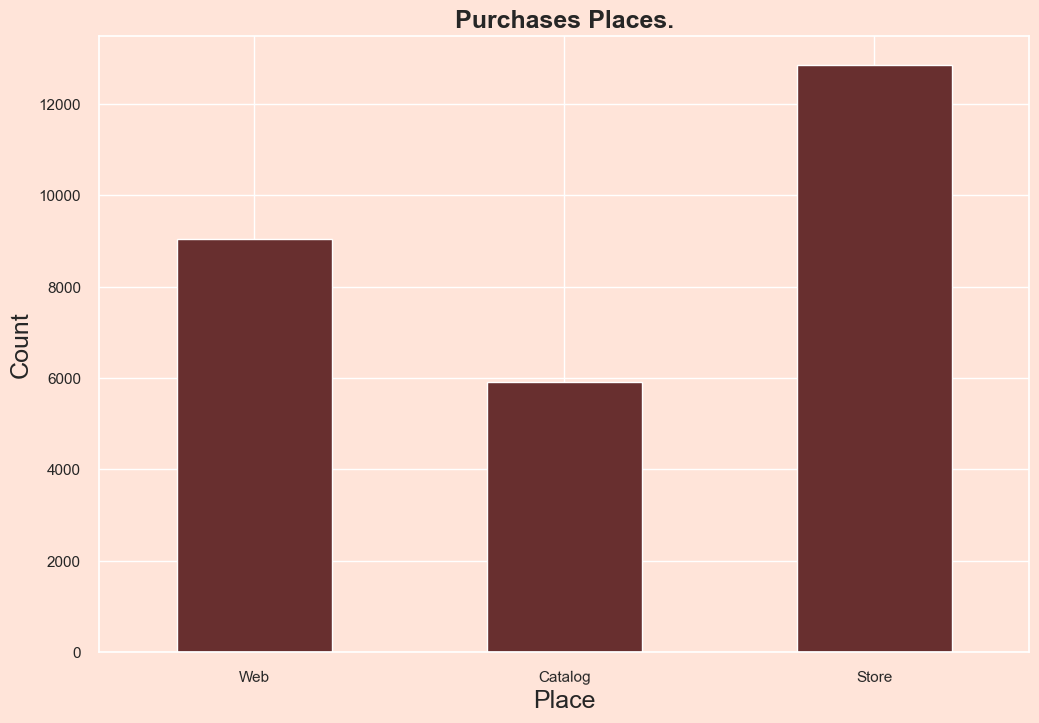

In [227]:
Purchases.plot(kind='bar', legend=False)
plt.title("Purchases places.".title(), fontsize=18, weight="bold")
plt.xticks(rotation=0.45)
plt.xlabel("Place", fontsize=18)
plt.ylabel("Count", fontsize=18)
# Display the plot
plt.show()

-----------

##### 'Complain Column'
- 1 if the customer complained in the last 2 years, 0 otherwise

In [228]:
pd.DataFrame({"Count" : data["Complain"].value_counts(),
              "Ratio" : round(data["Complain"].value_counts(normalize=True),3)*100})

Count  Ratio
Complain              
0          2194   99.1
1            21    0.9

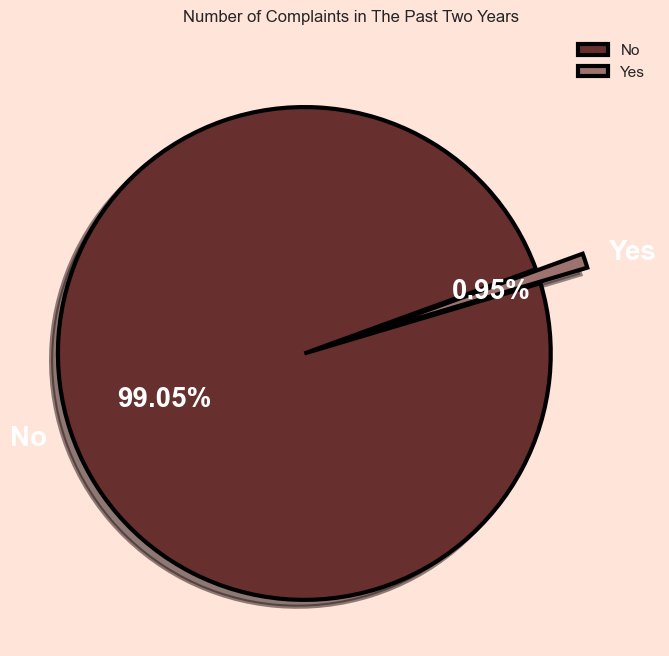

In [229]:
Complain_counts = data["Complain"].value_counts()
plt.pie(Complain_counts.values,
        labels=Complain_counts.index.map({0: "No", 1: "Yes"}),
        explode=[0.2,0],
        shadow=True,
        textprops=dict(size= 20, color= "white", weight="bold"),
        autopct="%.2f%%",
        wedgeprops=dict(edgecolor = "black", linewidth = 3),
        startangle = 20)
plt.title("Number of Complaints in The Past Two Years")
plt.legend(["No", "Yes"])
plt.show() 


<div class="alert alert-block alert-info" style="background-color:#D6B2B1;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 
                                                 %;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> 99% of customers have not complained in the past two years . </div>


##### 'Dt_Customer' 
- Date of customer's enrollment with the company

In [230]:
## month feature creation
data["customer_month"] = data["Dt_customer"].dt.month_name()
## year feature creation
data["customer_year"] = data["Dt_customer"].dt.year
## day feature creation
data["day_name"] = data["Dt_customer"].dt.day_name()

In [231]:
data["customer_month"].value_counts().sort_values(ascending=False)

customer_month
August       219
May          213
October      210
March        209
January      195
September    191
November     183
April        181
February     177
December     175
June         162
July         100
Name: count, dtype: int64

In [232]:
data["customer_year"].value_counts().sort_values(ascending=False)

customer_year
2013    1172
2014     553
2012     490
Name: count, dtype: int64


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:30%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> In 2013, we gained many customers.</div>


###### 'Numwebvisitsmonth Column'
- Number of visits to company’s website in the last month

In [233]:
data["Numwebvisitsmonth"].describe()

count    2215.000000
mean        5.318736
std         2.425863
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: Numwebvisitsmonth, dtype: float64

In [234]:
data["Numwebvisitsmonth"].sum()

11781


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:35%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The Total of Num Web Visits Month = 11781.</div>


-----------------

## <b>3.2 <span style='color:#682F2F'>Bi-variate/Multivariate analysis</span></b>

#### `1. Is there a relationship between age and annual income? Does income tend to increase or decrease with age?`

In [235]:
corre = data[["Income", "Age"]].corr()
print(f"The Correlation Between Income and Age = {round(corre.loc['Age','Income'],3)}")

The Correlation Between Income and Age = 0.2


In [236]:
def scatter_plot(Data, X, Y, h=None):
    sns.scatterplot(data=Data, x=X, y=Y,  hue=h)
    plt.title(f"Correlation Between {X} and {Y}.")
    plt.xlabel(f"{X}")
    plt.ylabel(f"{Y}")
    plt.show()

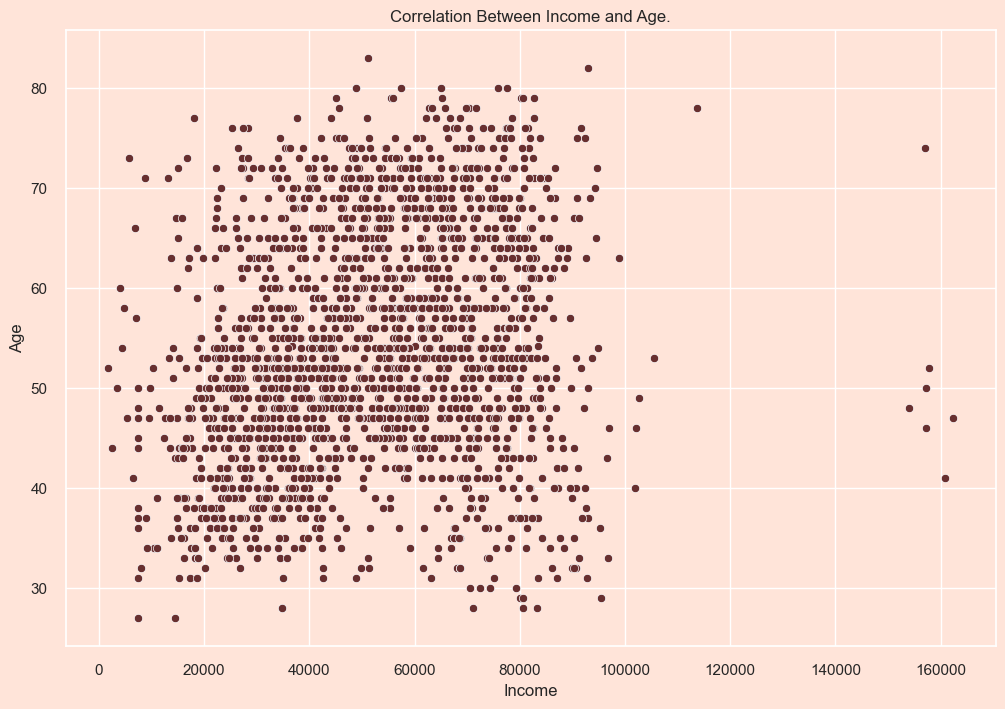

In [237]:
scatter_plot(Data=data, X="Income", Y="Age")


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> The Correlation Between (Income, Age) is Weak Positive Corr.</div>


#### `2. Are there differences in purchase preferences between married and single individuals?`

In [238]:
data.groupby('Marital_status')['Spending'].sum().to_frame()

Spending
Marital_status          
Alone             489525
In couple         855692

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:53%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Obviously, Married Customers Spend More Money Than Single Customers.</div>


In [239]:
products_list = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

In [240]:
l = data.groupby('Marital_status')[products_list].sum()

In [241]:
fig = px.bar(data_frame=l.reset_index(), x='Marital_status',
            y=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
            barmode="group", title="<b> Marital Status by Products Purchase",
            color_discrete_sequence=px.colors.sequential.Greys_r)
fig.show()

#### `3. Is there a relationship between education level and annual income?`

In [242]:
data.groupby("Education")["Income"].sum().to_frame()

Income
Education                 
Postgraduate   104490067.0
Undergraduate   10623176.0

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:55%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Postgraduate Customer have more income than Undergraduate .</div>


In [243]:
fig = px.histogram(data_frame=data, x="Income", color="Education", 
                   title= "Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

In [244]:
fig1 = px.box(data_frame=data, x="Education", y="Income",
             title= "<b> Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig2 = px.strip(data, x="Education", y="Income", color_discrete_sequence=px.colors.qualitative.Antique)
all_fig = go.Figure(data=fig1.data + fig2.data, layout=fig1.layout) ## combine
all_fig.show()

#### 4. explore the correlation between Age and Income.`

In [245]:
data[["Age", "Income"]].corr()

Age    Income
Age     1.000000  0.199855
Income  0.199855  1.000000

In [246]:
px.scatter(data_frame=data, x="Income", y="Age",
           title="<b>Correlation Between Age and Income",  color_discrete_sequence=px.colors.qualitative.Antique)

**The Correlation between income and age is Weak Positive.**

#### `Divide the data into age groups and compare the income levels within each group.`

In [247]:
## List of bins 
bins = [20, 40, 60 , 80, np.inf]
print(bins)

## Define labels
labels = ['20-40', '40-60', '60-80', 'Over 80']
print(labels)

# Customers Age Group
data["Age_Group"] = pd.cut(data["Age"], bins, labels=labels)

[20, 40, 60, 80, inf]
['20-40', '40-60', '60-80', 'Over 80']


In [248]:
data.groupby("Age_Group")["Income"].sum().sort_values(ascending=False).reset_index()

Age_Group      Income
0     40-60  61737314.0
1     60-80  39638255.0
2     20-40  13593506.0
3   Over 80    144168.0

**The highest income is for people between the ages of 40-60**

In [249]:
fig = px.histogram(data_frame=data,
       x="Age_Group",
       y="Income",  color="Age_Group", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

#### `5. How does customer spending vary by month?`

In [250]:
## the average spending score and total purchase amount for each month.
data.groupby("customer_month")["Spending"].agg(["mean","sum"])

mean     sum
customer_month                    
April           567.712707  102756
August          657.456621  143983
December        553.354286   96837
February        628.316384  111212
January         616.092308  120138
July            509.390000   50939
June            499.172840   80866
March           547.511962  114430
May             595.380282  126816
November        740.224044  135461
October         614.328571  129009
September       695.130890  132770

In [251]:
# Create a line plot to visualize the variations in customer spending across months.
fig = px.box(data_frame=data, x="customer_month", y="Spending", color="customer_month", title="<b>Monthly Spending", 
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(
    xaxis=dict(title="Month"),
    yaxis=dict(title="Spending Amount")
)
fig.show()

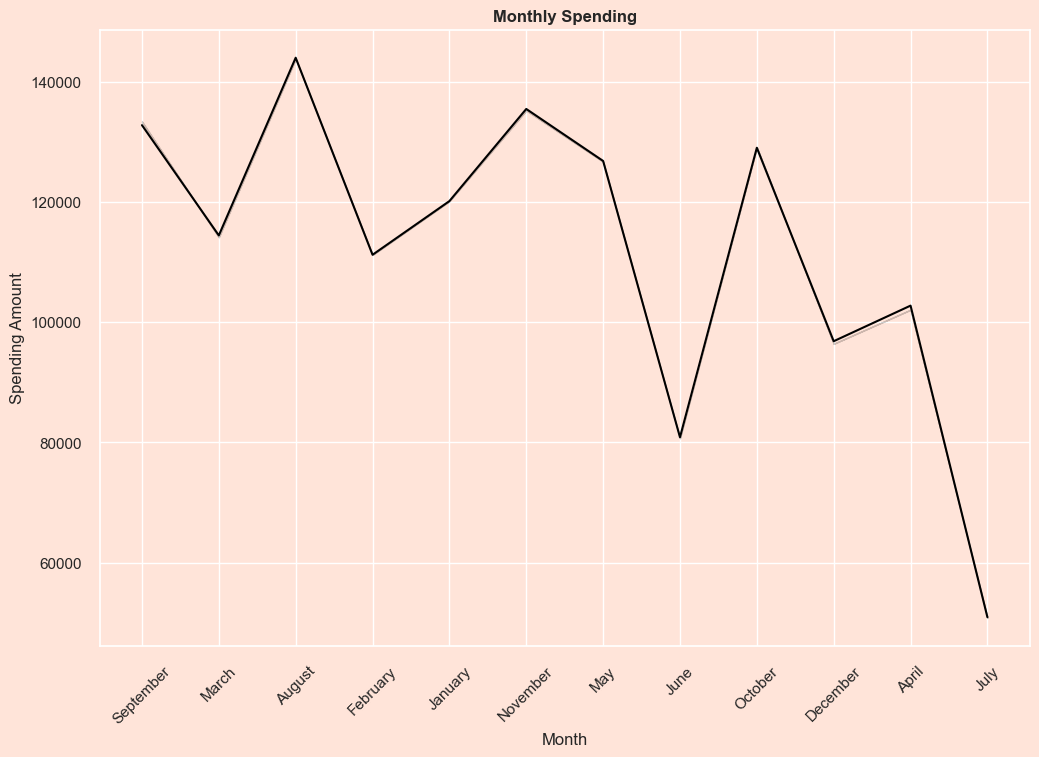

In [252]:
sns.lineplot(data=data, x="customer_month", y="Spending", ci=False, estimator=sum, color="black")
plt.title("Monthly Spending", weight="bold")
plt.xlabel("Month")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> August shows the highest amount, while July exhibits the lowest. </div>


#### `7. Day Vs. Spending`

In [253]:
data.groupby("day_name")["Spending"].sum().sort_values(ascending=False)

day_name
Monday       217036
Friday       213833
Wednesday    209636
Saturday     197177
Sunday       173054
Thursday     167574
Tuesday      166907
Name: Spending, dtype: int64

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:40%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> Higher spending on Monday, less spending on Tuesday.</div>

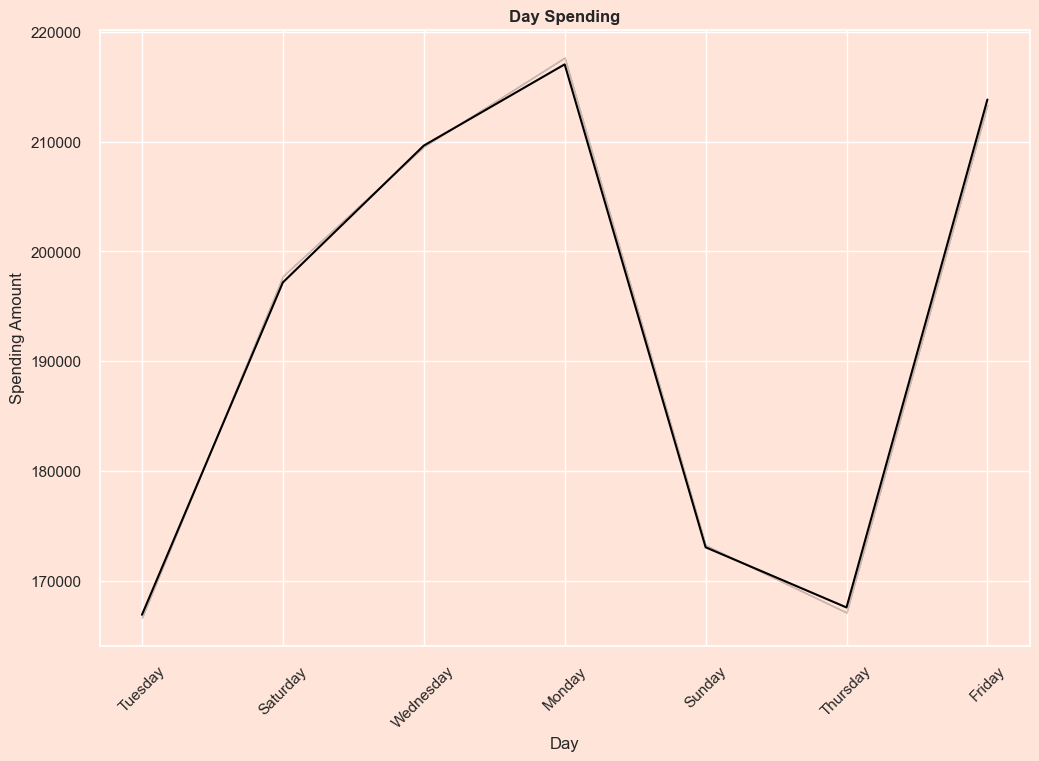

In [254]:
sns.lineplot(data=data, x="day_name", y="Spending", ci=False, estimator=sum, color="black")
plt.title("Day Spending", weight="bold")
plt.xlabel("Day")
plt.ylabel("Spending Amount")
plt.xticks(rotation=45)
plt.show()

#### `8. Income Vs. Spending`

In [255]:
data[["Income", "Spending"]].corr()

Income  Spending
Income    1.00000   0.79265
Spending  0.79265   1.00000

<div class="alert alert-block alert-info" style="background-color:#B3E5B2;
                                                 color:black;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:45%;
                                                 margin: auto;
                                                 text-align: left;">
<b></b> There is a Positive Correlation between Income and Spending.</div>


In [256]:
fig = px.scatter(data_frame=data, x="Income",y="Spending", color="Education",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Income and Spending")
fig.show()

#### `9. Deals Vs. (day, month, year)`

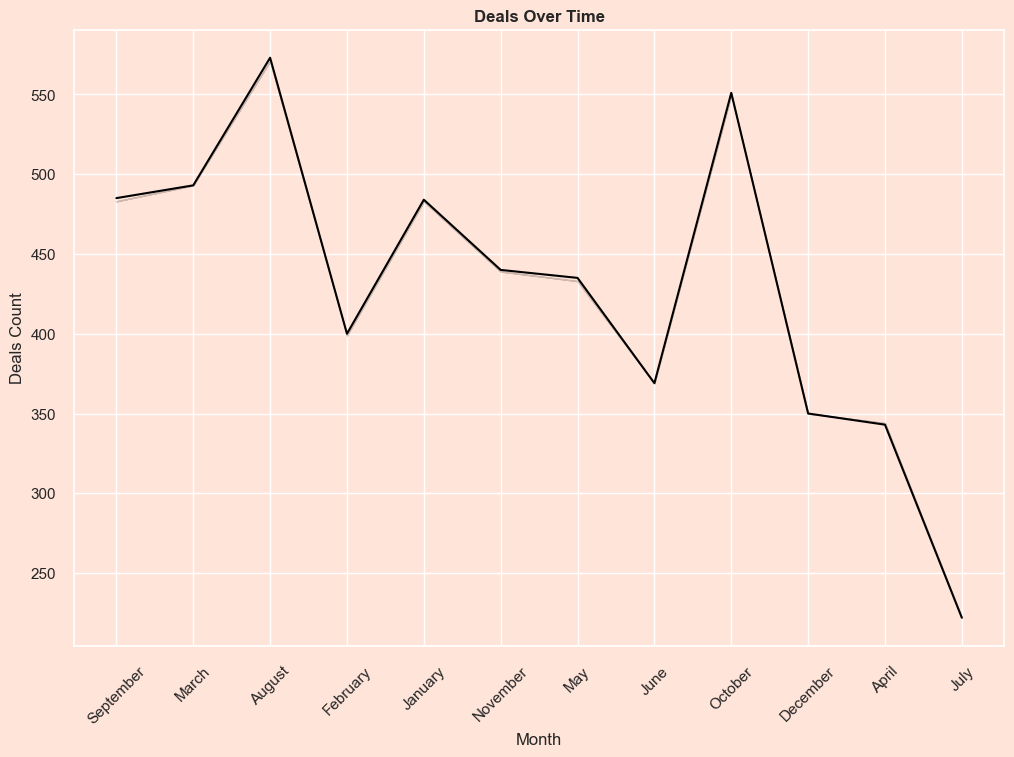

In [257]:
sns.lineplot(data=data, x="customer_month", y="Deals", ci=False, estimator=sum, color="black")
plt.title("Deals Over Time", weight="bold")
plt.xlabel("Month")
plt.ylabel("Deals Count")
plt.xticks(rotation=45)
plt.show()

**The month with the most offers is August and the month with the most spending is August.**
**Let's show the correlation between spending and deals**

In [258]:
data[["Deals", "Spending"]].corr()

Deals  Spending
Deals     1.000000 -0.065521
Spending -0.065521  1.000000

In [259]:
fig = px.scatter(data_frame=data, y="Deals", x="Spending",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Deals and Spending")
fig.show()

**There is no correlation between Deals and Spending.**

----------------

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#B3E5B2;
            overflow:hidden;
            font-weight:700"> <span style='color:#CDA63A'></span> Data Preparation for ML Model
</div>

In [260]:
## create copy from data
df_final = data.copy()
print(df_final.shape)

(2215, 28)


In [261]:
## Select Categorical Columns 
categorical_cols = df_final.select_dtypes(include="object").columns.to_list()
print(categorical_cols)

['Education', 'Marital_status', 'Children', 'Has_child', 'customer_month', 'day_name']


## <b>4.1 <span style='color:#682F2F'> Encoding </span></b>

**Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.**

In [262]:
label_encoding = LabelEncoder() ## Create label_encoding object

In [263]:
for col in categorical_cols: 
    df_final[col] = label_encoding.fit_transform(df_final[col]) 

In [264]:
df_final.sample(10) ## Take a sample

Education  Marital_status   Income Dt_customer  Recency  Wines  Fruits  \
598           0               0  45006.0  2013-07-18       90    162      25   
69            0               0  40246.0  2012-12-19       68      2       1   
220           1               0  81975.0  2013-01-05        2    983      76   
1368          0               1  20895.0  2012-10-06       24     18       3   
1890          0               1  33235.0  2014-02-05       71     45       0   
24            0               0  18589.0  2013-01-02       89      6       4   
1143          0               1  46049.0  2013-07-21       11    342       9   
2009          0               1  29672.0  2013-03-12        6      9       1   
1627          1               1  75774.0  2014-05-02       27    340      21   
1270          0               1  39767.0  2013-07-21       18    113      61   

      Meat  Fish  Sweets  Gold  Deals  Web  Catalog  Store  Numwebvisitsmonth  \
598     53    16       0    10      1    3        1      7                  3   
69       6     2       1     1      1    1        0      2                  6   
220    184   180     138    27      1    6        3      4                  7   
1368    17     3       0     4      1    2        0      3                  9   
1890    16     2       1     6      1    3        0      3                  7   
24      25    15      12    13      2    2        1      3                  7   
1143   112    19      14    19     10    5        2      9                  7   
2009     3     0       4     8      1    0        0      3                  6   
1627   134   258      14    56      1    7        5      8                  4   
1270   204    34      26    47      2    7        1      7                  8   

      Complain  Response   Age  Spending  Seniority  Children  Has_child  \
598          0         0  79.0       266  10.153425         3          1   
69           0         0  46.0        13  10.731507         0          0   
220          0         0  61.0      1588  10.684932         0          0   
1368         0         0  50.0        45  10.934247         0          0   
1890         0         0  37.0        70   9.600000         0          0   
24           0         0  54.0        75  10.693151         3          1   
1143         0         1  47.0       515  10.145205         1          0   
2009         0         0  58.0        25  10.504110         1          0   
1627         0         0  42.0       823   9.364384         0          0   
1270         0         0  72.0       485  10.145205         3          1   

      Campaigns_accepted  customer_month  customer_year  day_name Age_Group  
598                    0               5           2013         4     60-80  
69                     0               2           2012         6     40-60  
220                    1               4           2013         2     60-80  
1368                   0              10           2012         2     40-60  
1890                   0               3           2014         6     20-40  
24                     0               4           2013         6     40-60  
1143                   0               5           2013         3     40-60  
2009                   0               7           2013         5     40-60  
1627                   0               8           2014         0     40-60  
1270                   0               5           2013         3     60-80

In [265]:
categorical_cols = df_final.select_dtypes(include="object").columns.to_list()
print(f" Categorical columns : {categorical_cols}")

 Categorical columns : []


**Encoding Done**

In [266]:
cols_drop = ["Age_Group", "Dt_customer", "day_name","customer_month","customer_year"] ## Select Cols to drop 
df_final.drop(cols_drop, axis=1, inplace=True)

In [267]:
df_final.sample(10)

Education  Marital_status   Income  Recency  Wines  Fruits  Meat  Fish  \
14            0               0  82800.0       23   1006      22   115    59   
2019          0               1  75330.0       94    555      82   257    93   
1306          0               1  37235.0       68     20       2     9     4   
612           0               1  13624.0       93     10       2    15     2   
1999          0               1  36790.0       14      3       3    14    15   
775           0               1  43783.0       22    327       9   125    25   
1712          0               1  71107.0       61    533      10   217   198   
712           0               1  44794.0       99     54       0     7     0   
1703          0               1  17688.0       82      2       2     1     3   
263           0               0  33378.0       38     33       6    40     3   

      Sweets  Gold  Deals  Web  Catalog  Store  Numwebvisitsmonth  Complain  \
14        68    45      1    7        6     12                  3         0   
2019      61    61      4   10        3     12                  6         0   
1306       6    20      1    1        1      2                  4         0   
612        1     6      2    2        0      3                  6         0   
1999      21    10      1    2        1      2                  9         0   
775        4   139      6    7        1      8                  7         0   
1712     174   195      2    7        6     13                  4         0   
712        0     4      1    2        0      3                  6         0   
1703       1     2      1    1        0      2                  8         1   
263        7    10      3    2        0      4                  7         0   

      Response   Age  Spending  Seniority  Children  Has_child  \
14           1  77.0      1315  10.800000         3          1   
2019         0  46.0      1109  10.939726         1          0   
1306         0  39.0        61   9.610959         0          0   
612          0  47.0        36  10.643836         0          0   
1999         1  40.0        66  10.534247         3          1   
775          0  45.0       629   9.290411         0          0   
1712         0  72.0      1327  10.567123         0          0   
712          0  57.0        65   9.263014         0          0   
1703         0  44.0        11  10.663014         0          0   
263          0  60.0        99  10.597260         1          0   

      Campaigns_accepted  
14                     2  
2019                   0  
1306                   0  
612                    0  
1999                   0  
775                    1  
1712                   0  
712                    0  
1703                   0  
263                    0

---------------

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#B3E5B2;
            overflow:hidden;
            font-weight:700"> <span style='color:#CDA63A'></span> Model training, testing and evaluation
</div>

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
df_final.columns

Index(['Education', 'Marital_status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Numwebvisitsmonth', 'Complain', 'Response', 'Age', 'Spending',
       'Seniority', 'Children', 'Has_child', 'Campaigns_accepted'],
      dtype='object')

In [270]:
X_train, X_test, y_train, y_test = train_test_split(df_final[['Education', 'Marital_status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Numwebvisitsmonth', 'Complain','Age', 'Spending',
       'Seniority', 'Children', 'Has_child','Campaigns_accepted']],df_final['Response'], 
                                                    test_size = 0.20, 
                                                    random_state=1) 

In [271]:
X_train.shape, X_test.shape

((1772, 22), (443, 22))

### Decision Tree Classifier

In [272]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_error= np.mean(dt_pred != y_test)
print(f"Decision Tree Error: {dt_error:.2f}")

dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Error: 0.17
Decision Tree Accuracy: 0.83


### Random Forest

In [273]:
RF_model = RandomForestClassifier(random_state=1)
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)

RF_error = np.mean(RF_pred != y_test)
print(f"RF Error: {RF_error:.2f}")

RF_accuracy = accuracy_score(y_test, RF_pred)
print(f"RF Accuracy: {RF_accuracy:.2f}")

RF Error: 0.11
RF Accuracy: 0.89


### Logistic Regression

In [274]:
LR_model = LogisticRegression(random_state=1)
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)

LR_error = np.mean(LR_pred != y_test)
print(f"LR Error: {LR_error:.2f}")

LR_accuracy = accuracy_score(y_test, LR_pred)
print(f"LR Accuracy: {LR_accuracy:.2f}")

LR Error: 0.13
LR Accuracy: 0.87


<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#B3E5B2;
            overflow:hidden;
            font-weight:700"> <span style='color:#CDA63A'></span>Apply XAI Methods
</div>

### Feature Importance with SHAP

In [275]:
from sklearn.metrics import accuracy_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.89


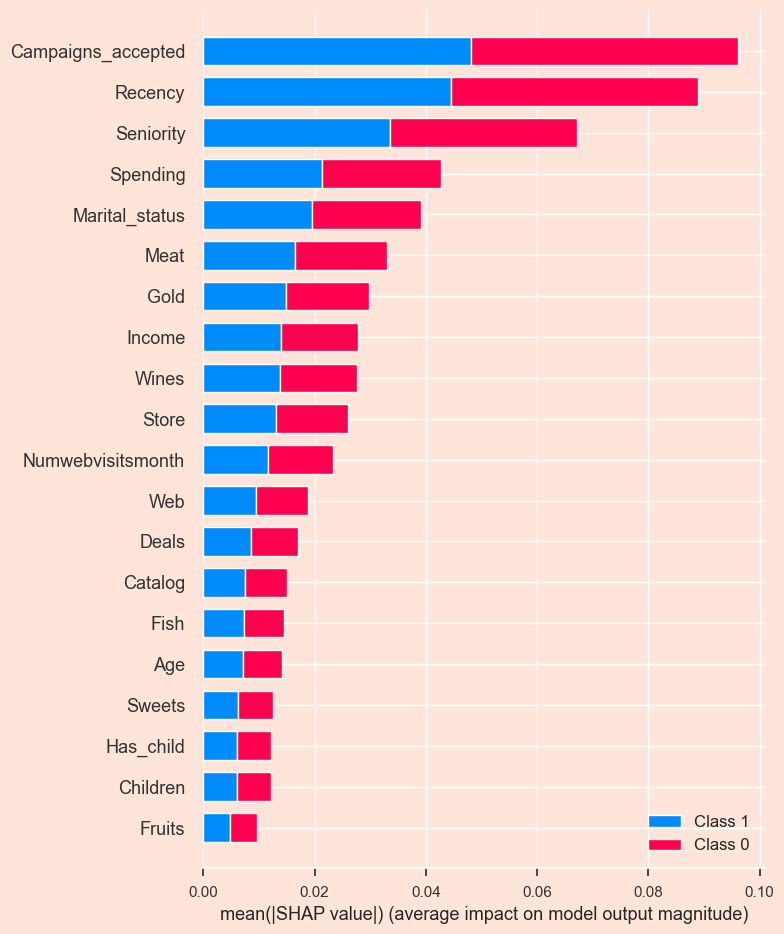

In [276]:
import shap

# Explain predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)

### Local Interpretability with LIME

In [277]:
from lime import lime_tabular

# Explain a single prediction using LIME
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='classification')
exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)

# Visualize explanation
exp.show_in_notebook()